# IMDb Movie Review Sentiment Analysis

This notebook is for practicing a deep learning model to perform sentiment analysis. The objective is to classify movie reviews from the popular IMDb dataset as either positive or negative.

Along with that I'm also learning NLP (Natural Language Processing)

---
## Technologies Used
* Python
* TensorFlow & Keras
* NumPy
* Matplotlib

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


print("Dataset loaded successfully!")
print(f"Number of training reviews: {len(train_data)}")
print(f"Number of testing reviews: {len(test_data)}")

Dataset loaded successfully!
Number of training reviews: 25000
Number of testing reviews: 25000


In [26]:
word_index = imdb.get_word_index()

reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"    
reverse_word_index[1] = "<START>"  
reverse_word_index[2] = "<UNK>"    
reverse_word_index[3] = "<UNUSED>" 


decoded_review = ' '.join([reverse_word_index.get(i, '?') for i in train_data[0]])

print("--- First Review (Encoded as numbers) ---")
print(train_data[0])
print("\n--- Same Review (Decoded back to text) ---")
print(decoded_review)
print(f"\n--- Label for this review ---")
print(f"{train_labels[0]} (1 = Positive, 0 = Negative)")

--- First Review (Encoded as numbers) ---
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

--- Same Review (

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 250

padded_train_data = pad_sequences(train_data, maxlen=maxlen)
padded_test_data = pad_sequences(test_data, maxlen=maxlen)

print("Length of the first review before padding:", len(train_data[0]))
print("Length of the first review after padding:", len(padded_train_data[0]))

Length of the first review before padding: 218
Length of the first review after padding: 250


In [28]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),  # ADDED: Dropout layer
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # ADDED: Dropout layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the new model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

print("\nTraining complete")

Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5221 - loss: 0.6927 - val_accuracy: 0.5411 - val_loss: 0.6894
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5783 - loss: 0.6875 - val_accuracy: 0.6955 - val_loss: 0.6790
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6617 - loss: 0.6742 - val_accuracy: 0.7134 - val_loss: 0.6612
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7088 - loss: 0.6530 - val_accuracy: 0.7431 - val_loss: 0.6333
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7510 - loss: 0.6218 - val_accuracy: 0.7864 - val_loss: 0.5948
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7798 - loss: 0.5826 - val_accuracy: 0.8032 - val_loss: 0.5514
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8094 - loss: 0.5376 - val_accuracy: 0.8263 - val_loss: 0.5050
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8255 - loss: 0.4911 - val_accuracy: 0.8347 - v

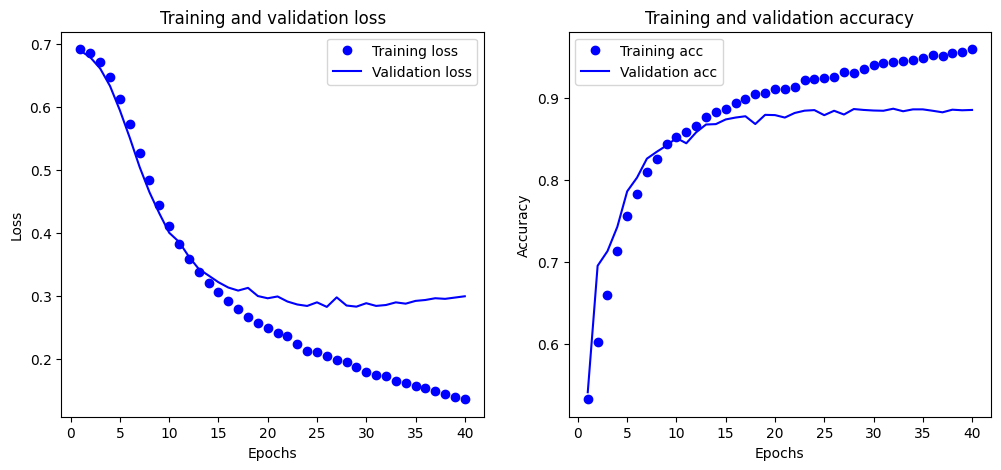

In [30]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:
results = model.evaluate(padded_test_data, test_labels, verbose=2)

print("\nFinal Test Results (with Dropout):")
print(f"Loss: {results[0]}")
print(f"Accuracy: {results[1]}")

782/782 - 1s - 2ms/step - accuracy: 0.8778 - loss: 0.3146

Final Test Results (with Dropout):
Loss: 0.31457147002220154
Accuracy: 0.8777999877929688


**New Data prediction**

In [32]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

my_review = "The movie was great and I really liked it"

word_index = imdb.get_word_index()

tokens = [word_index.get(word, 2) + 3 for word in my_review.lower().split()]

padded_tokens = pad_sequences([ [1] + tokens ], maxlen=250)

prediction = model.predict(padded_tokens)
probability = prediction[0][0]

print(f"\nReview: '{my_review}'")
print(f"Prediction Score: {probability:.4f}")

if probability > 0.5:
    print("Result: This is a POSITIVE review.")
else:
    print("Result: This is a NEGATIVE review.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

Review: 'The movie was great and I really liked it'
Prediction Score: 0.8941
Result: This is a POSITIVE review.


In [33]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

my_review = "The movie had some good parts but the ending was a complete letdown and ruined the whole experience"

word_index = imdb.get_word_index()

tokens = [word_index.get(word, 2) + 3 for word in my_review.lower().split()]

padded_tokens = pad_sequences([ [1] + tokens ], maxlen=250)

prediction = model.predict(padded_tokens)
probability = prediction[0][0]

print(f"\nReview: '{my_review}'")
print(f"Prediction Score: {probability:.4f}")

if probability > 0.5:
    print("Result: This is a POSITIVE review.")
else:
    print("Result: This is a NEGATIVE review.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Review: 'The movie had some good parts but the ending was a complete letdown and ruined the whole experience'
Prediction Score: 0.4868
Result: This is a NEGATIVE review.


## Conclusion & Key Learnings

This project successfully developed a neural network capable of classifying IMDb movie reviews as either positive or negative. The final, improved model achieved a test accuracy of **87.8%**.

The initial model established a strong baseline accuracy of **87.3%** but showed clear signs of **overfitting**; the training accuracy was significantly higher than the validation accuracy, and the validation loss began to increase over time.

To address this, the model was improved by introducing **Dropout layers** as a regularization technique. This proved to be highly effective:

* The training and validation curves tracked each other much more closely, indicating a more robust and generalized model.
* The final test accuracy **increased from 87.3% to 87.8%**.

The key takeaway from this iteration is the practical application of regularization to combat overfitting, leading to a quantifiable improvement in the model's performance on unseen data.